In [1]:
pip install diffusers transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 12.0 MB/s eta 0:00:00


In [2]:
from diffusers import AutoPipelineForText2Image
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
pipe = AutoPipelineForText2Image.from_pretrained("kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

movq/config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.01G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.10G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
prompt = "allegory of autumn in the style of Alfons Mucha"
neg_prompt = "low quality, bad quality"

With negative prompt

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2.py:202: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/100 [00:00<?, ?it/s]

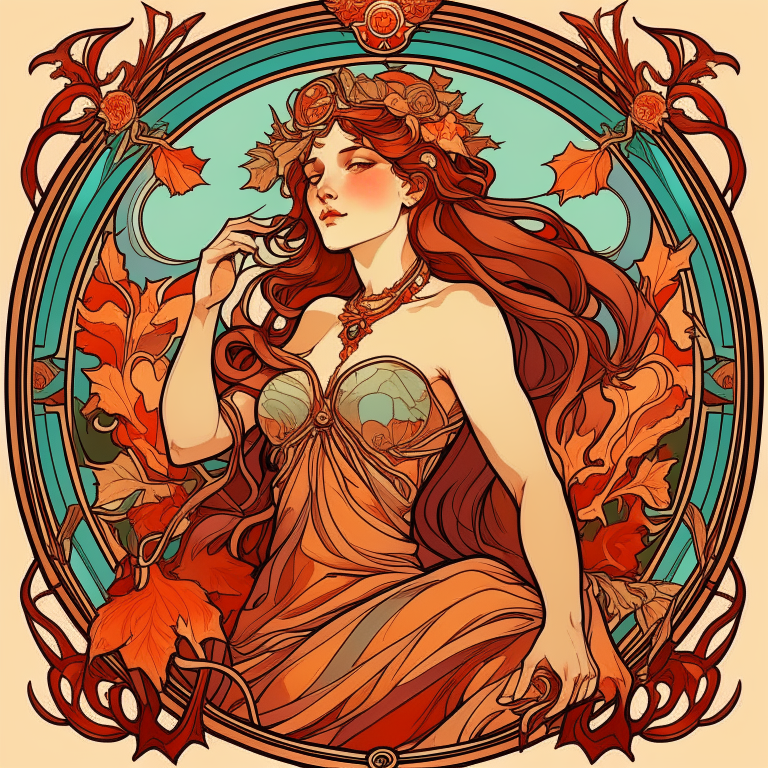

In [11]:
image1 = pipe(prompt=prompt, negative_prompt=neg_prompt, prior_guidance_scale =1.0, height=768, width=768).images[0]
image1
# image.save("portrait.png")

Without negative prompt

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

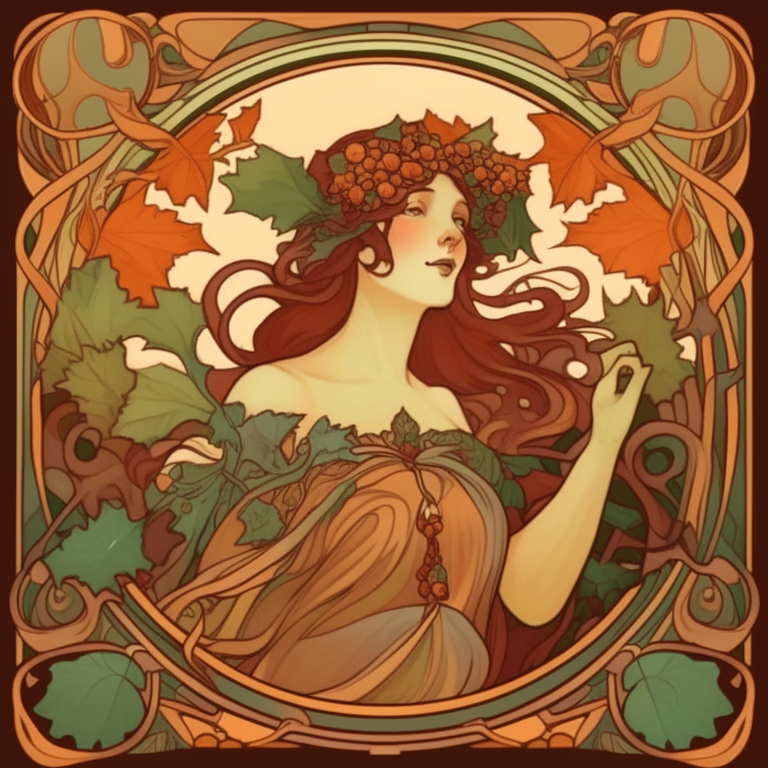

In [10]:
image2 = pipe(prompt=prompt, prior_guidance_scale =1.0, height=768, width=768).images[0]
image2

Number steps - 2

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

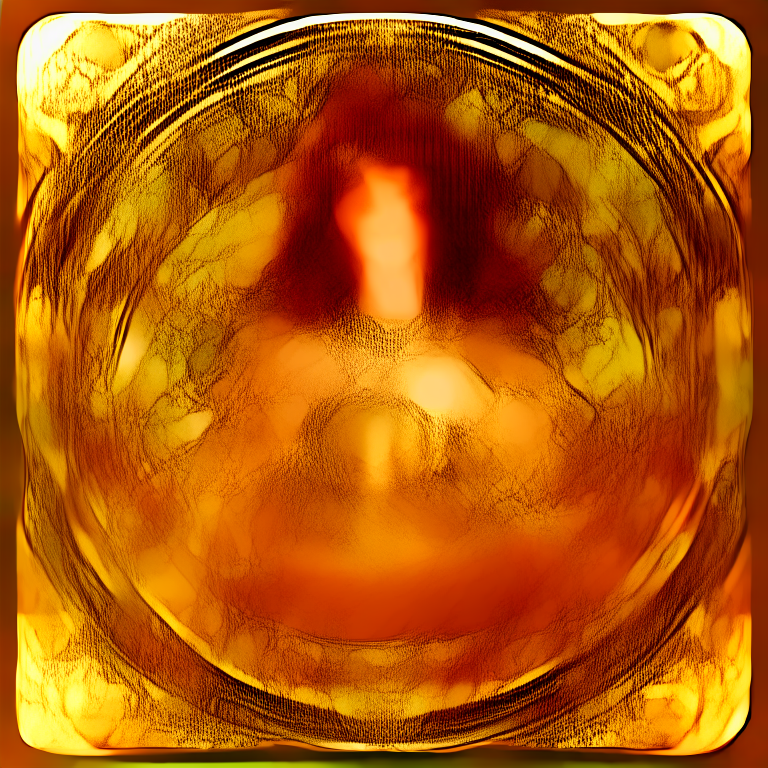

In [14]:
image3 = pipe(prompt=prompt, negative_prompt=neg_prompt, num_inference_steps=2, prior_guidance_scale =1.0, height=768, width=768).images[0]
image3

Number steps - 999 with negative prompt

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

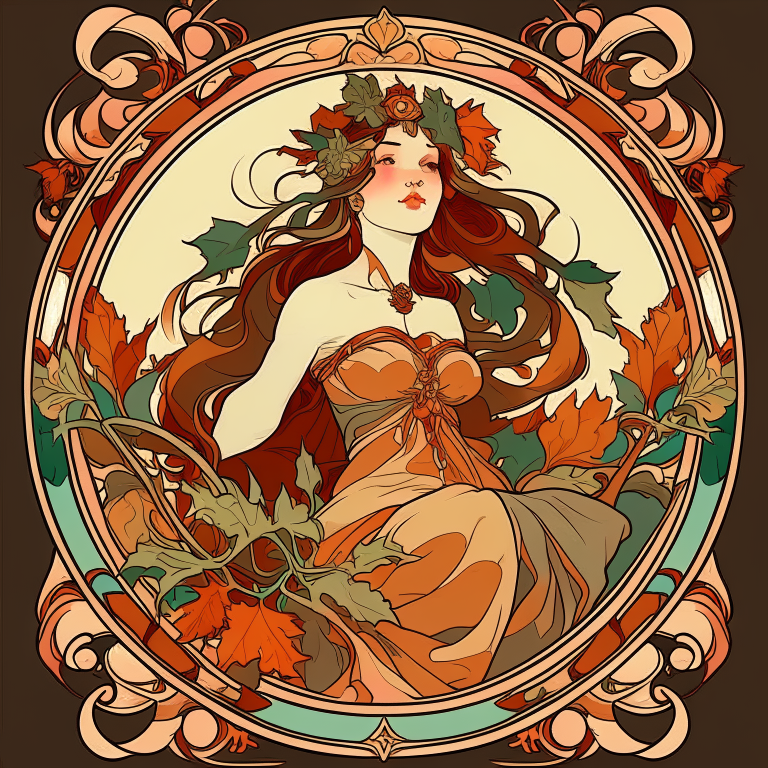

In [15]:
image4 = pipe(prompt=prompt, negative_prompt=neg_prompt, num_inference_steps=999, prior_guidance_scale =1.0, height=768, width=768).images[0]
image4

Number steps - 999 without negative prompt

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

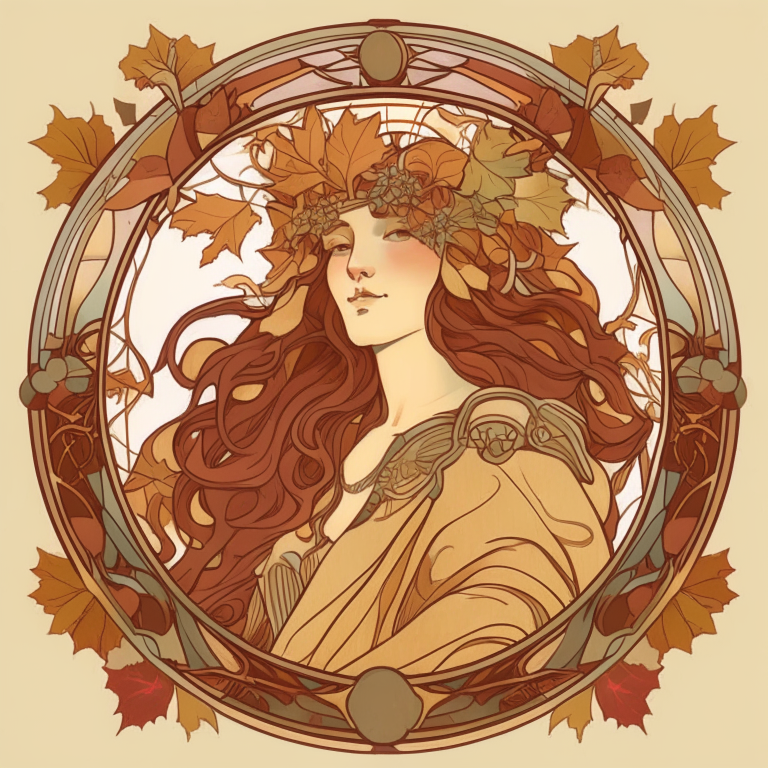

In [17]:
image5 = pipe(prompt=prompt, num_inference_steps=999, prior_guidance_scale =1.0, height=768, width=768).images[0]
image5